In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import met_base, snow_degree_day, infil_green_ampt, evap_priestley_taylor

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /Users/elchin/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/framework/
parent_dir    = /Users/elchin/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/
examples_dir  = /Users/elchin/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/examples/
__file__      = topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


In [2]:
met, sno, infl = met_base.met_component(), snow_degree_day.snow_component(), infil_green_ampt.infil_component()
evap=evap_priestley_taylor.evap_component()

In [3]:
cfg_file_met='topoflow/examples/Treynor_Iowa/June_20_67_meteorology.cfg'
cfg_file_sno='topoflow/examples/Treynor_Iowa/June_20_67_snow_degree_day.cfg'
cfg_file_inf='topoflow/examples/Treynor_Iowa/June_20_67_infil_green_ampt.cfg'
cfg_file_eva='topoflow/examples/Treynor_Iowa/June_20_67_evap_priestley_taylor.cfg'

In [4]:
met.initialize(cfg_file_met);

print met.get_values('atmosphere_water__snowfall_leq-volume_flux')
print met.get_values('water-liquid__mass-per-volume_density')
print met.get_values('atmosphere_bottom_air__temperature')

sno.P_snow=met.get_values('atmosphere_water__snowfall_leq-volume_flux')
sno.rho_H2O=met.get_values('water-liquid__mass-per-volume_density')
sno.T_air=met.get_values('atmosphere_bottom_air__temperature')

sno.initialize(cfg_file_sno);

#provide two components from met and snow
print met.get_values('atmosphere_water__rainfall_volume_flux')
print sno.get_values('snowpack__melt_volume_flux')
# will not run without these
infl.P_rain=met.get_values('atmosphere_water__rainfall_volume_flux')
infl.SM=sno.get_values('snowpack__melt_volume_flux')
infl.h_table=1
# need these for update to work
infl.elev=0.0
infl.initialize(cfg_file_inf);

 
Meteorology component: Initializing...
Scalar rainrate set to: 5.55555555556e-05  [mmph]
SORRY: Cannot yet create lon and lat grids for
       this DEM because it uses UTM coordinates.
       Will use lat/lon for Denver, Colorado.
 
Imported netCDF4 version: 1.2.2
0.0
1000.0
20.0
 
Snow component: Initializing...
Imported netCDF4 version: 1.2.2
0.0
0.0
 
Infiltration component: Initializing...
Imported netCDF4 version: 1.2.2


/Users/elchin/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2645: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [8]:
# will not run without these
print met.get_values('atmosphere_bottom_air__temperature')
print met.get_values('land_surface__temperature')

evap.Qn_SW=met.get_values('land_surface_net-shortwave-radiation__energy_flux')
evap.Qn_LW=met.get_values('land_surface_net-longwave-radiation__energy_flux')
evap.T_air=met.get_values('atmosphere_bottom_air__temperature')
evap.T_surf=met.get_values('land_surface__temperature')
evap.initialize(cfg_file_eva);
evap.get_current_time()

20.0
-5.0
 
Evaporation component: Initializing...
Imported netCDF4 version: 1.2.2


array(0.0)

In [9]:
time = [met.get_current_time().copy()]
# NOTE: EMELI does not have get_value
Q_sum = [met.get_values('land_surface_net-total-energy__energy_flux').copy()]

print met.get_current_time(), met.get_end_time()
print sno.get_current_time(), sno.get_end_time()
print infl.get_current_time(), infl.get_end_time()

while met.get_current_time() < met.get_end_time():
    met.h_snow=sno.get_values('snowpack__depth')
    met.update()
    
    
    time.append(met.get_current_time().copy())
    sno.P_snow=met.get_values('atmosphere_water__snowfall_leq-volume_flux')
    sno.rho_H2O=met.get_values('water-liquid__mass-per-volume_density')
    sno.T_air=met.get_values('atmosphere_bottom_air__temperature')
    print 'T air=',met.T_air
    print 'P_rain=',met.P_rain
    print 'Q_sum=',met.Q_sum
    
    sno.update()
    time.append(sno.get_current_time().copy())
    #met.h_snow=sno.get_values('snowpack__depth')
    print 'snow depth=',met.h_snow
    
    infl.P_rain=met.get_values('atmosphere_water__rainfall_volume_flux')
    infl.SM=sno.get_values('snowpack__melt_volume_flux')
    
    infl.update()
    time.append(infl.get_current_time().copy())
    print 'vol_rg=',infl.vol_Rg

    evap.Qn_SW=met.get_values('land_surface_net-shortwave-radiation__energy_flux')
    evap.Qn_LW=met.get_values('land_surface_net-longwave-radiation__energy_flux')
    evap.T_air=met.get_values('atmosphere_bottom_air__temperature')
    evap.T_surf=met.get_values('land_surface__temperature')
    evap.update();
    #Q_sum.append(met.get_values('land_surface_net-total-energy__energy_flux').copy() )
    
#print time, Q_sum

0.0 600.0
0.0 36000.0
0.0 600.0
T air= 20.0
P_rain= 0.0
Q_sum= [[ 3214.75746689  3214.75746689  3214.75746689 ...,  3214.75746689
   3214.75746689  3214.75746689]
 [ 3214.75746689  3214.75746689  3214.75746689 ...,  3214.75746689
   3214.75746689  3214.75746689]
 [ 3214.75746689  3214.75746689  3214.75746689 ...,  3214.75746689
   3214.75746689  3214.75746689]
 ..., 
 [ 3214.75746689  3214.75746689  3214.75746689 ...,  3214.75746689
   3214.75746689  3214.75746689]
 [ 3214.75746689  3214.75746689  3214.75746689 ...,  3214.75746689
   3214.75746689  3214.75746689]
 [ 3214.75746689  3214.75746689  3214.75746689 ...,  3214.75746689
   3214.75746689  3214.75746689]]
snow depth= 0.492425
vol_rg= 43.49565
T air= 20.0
P_rain= 0.0
Q_sum= [[ 3213.96709736  3213.96709736  3213.96709736 ...,  3213.96709736
   3213.96709736  3213.96709736]
 [ 3213.96709736  3213.96709736  3213.96709736 ...,  3213.96709736
   3213.96709736  3213.96709736]
 [ 3213.96709736  3213.96709736  3213.96709736 ...,  3213.96

topoflow/components/solar_funcs.py:740: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (hour_num != None):


In [17]:
np.shape(met.Q_sum), np.shape(sno.T_air),

((44, 29), ())

In [ ]:
met.Q_sum[:,0]

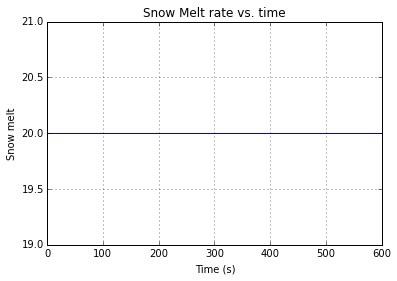

In [16]:
plt.plot(time,T_air,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('Snow melt')
plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()